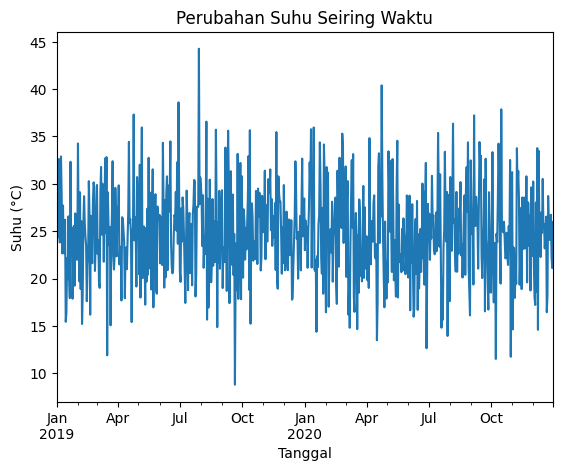

ADF Statistic: -27.730758115182688
p-value: 0.0
Data stasioner.


/home/fajarshiddiqqq/miniconda3/envs/bukusilvanus/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/fajarshiddiqqq/miniconda3/envs/bukusilvanus/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/fajarshiddiqqq/miniconda3/envs/bukusilvanus/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Prediksi suhu dalam 7 hari: 2020-08-07    26.799734
2020-08-08    29.155816
2020-08-09    28.374371
2020-08-10    27.657613
2020-08-11    29.807632
2020-08-12    29.837504
2020-08-13    28.560598
Freq: D, Name: predicted_mean, dtype: float64
RMSE: 6.429627300872367


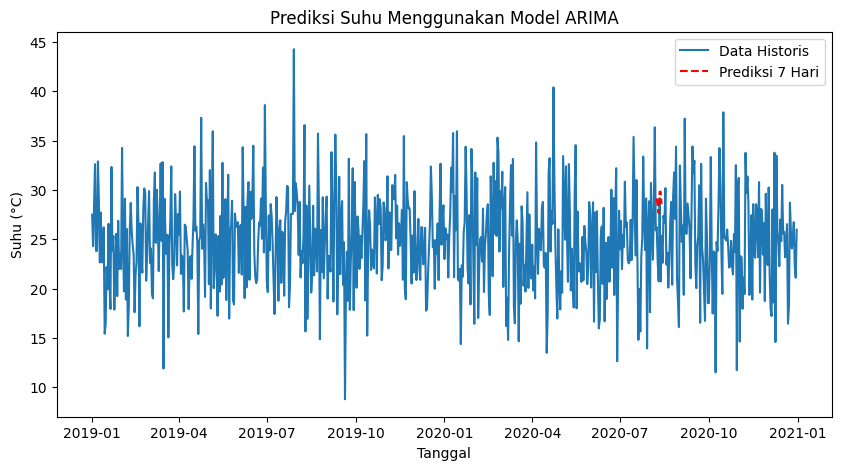

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Memuat Data Cuaca
df = pd.read_csv('data_suhu.csv', parse_dates=['date'], index_col='date')

# Visualisasi Data
df['temperature'].plot()
plt.title('Perubahan Suhu Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.show()

# 2. Menguji Stasionaritas (Augmented Dickey-Fuller Test)
result = adfuller(df['temperature'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Memeriksa apakah data stasioner atau tidak
if result[1] > 0.05:
    print("Data tidak stasioner, perlu dilakukan differencing.")
else:
    print("Data stasioner.")

# 3. Membangun Model ARIMA (jika data tidak stasioner, lakukan differencing)
if result[1] > 0.05:
    # Melakukan differencing untuk menjadikan data stasioner
    df['temperature_diff'] = df['temperature'].diff().dropna()

    # Uji kembali stasionaritas pada data yang sudah didifferencing
    result_diff = adfuller(df['temperature_diff'].dropna())
    
    print('ADF Statistic (differenced):', result_diff[0])
    print('p-value (differenced):', result_diff[1])
    if result_diff[1] <= 0.05:
        print("Data setelah differencing sudah stasioner.")
    else:
        print("Data setelah differencing masih belum stasioner.")
    df = df.dropna() # Menghapus nilai NaN setelah differencing

# 4. Membagi Data menjadi Data Latih dan Uji
train_size = int(len(df) * 0.8)  # 80% untuk training
train, test = df['temperature'][:train_size], df['temperature'][train_size:]

# Membuat Model ARIMA dengan parameter (p=5, d=1, q=0)
model = ARIMA(train, order=(5, 1, 0)) # p=5, d=1, q=0
model_fit = model.fit()

# 5. Melakukan Prediksi untuk 7 Hari ke Depan
forecast = model_fit.forecast(steps=7)
print(f'Prediksi suhu dalam 7 hari: {forecast}')

# 6. Evaluasi Model (menggunakan RMSE)
forecast_test = model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast_test))
print(f'RMSE: {rmse}') 

# 7. Visualisasi Hasil Prediksi
forecast_index = pd.date_range(start=df.index[train_size], periods=8, freq='D')[1:] # 7 hari berikutnya
forecast_series = pd.Series(forecast, index=forecast_index)

# Visualisasi Data Historis dan Prediksi
plt.figure(figsize=(10, 5))
plt.plot(df['temperature'], label='Data Historis')
plt.plot(forecast_series, label='Prediksi 7 Hari', color='red', linestyle='--')
plt.title('Prediksi Suhu Menggunakan Model ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.show()
